In [1]:
from utility import load_test_results, architecture_stats, sample_image, plot_hyper, architectures_analysis

from NeuralNetwork import NeuralNetwork, torch

In [2]:
classifiers_dict, all_results = load_test_results("Classifier_2")

In [3]:
classifiers_dict

{0: "Classifier_2 (n_neurons_molt_factor=1, do_dropout=['FC1'])",
 1: "Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2', 'FC1'])",
 2: 'Classifier_2 (n_neurons_molt_factor=1, do_dropout=[])',
 3: "Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['FC1'])",
 4: "Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2'])",
 5: "Classifier_2 (n_neurons_molt_factor=2, do_dropout=['FC1'])",
 6: "Classifier_2 (n_neurons_molt_factor=2, do_dropout=['Conv2'])",
 7: 'Classifier_2 (n_neurons_molt_factor=2, do_dropout=[])',
 8: "Classifier_2 (n_neurons_molt_factor=1, do_dropout=['Conv2', 'FC1'])",
 9: 'Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=[])',
 10: "Classifier_2 (n_neurons_molt_factor=1, do_dropout=['Conv2'])",
 11: "Classifier_2 (n_neurons_molt_factor=2, do_dropout=['Conv2', 'FC1'])"}

In [4]:
all_results.head(10)

,test_id,architecture_id,n_neurons_molt_factor,do_dropout,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
0,0,0,1.0,['FC1'],AMSGrad,0.0005,32,5,0.00,0.944506,0.059917,16.733004
1,1,0,1.0,['FC1'],AMSGrad,0.0005,32,5,0.25,0.950084,0.059736,24.797422
2,2,0,1.0,['FC1'],AMSGrad,0.0005,32,5,0.50,0.971277,0.059746,22.047579
3,3,0,1.0,['FC1'],AMSGrad,0.0005,32,5,0.75,0.974066,0.059695,11.281463
4,4,0,1.0,['FC1'],AMSGrad,0.0005,32,10,0.00,0.968070,0.059809,8.357930
5,5,0,1.0,['FC1'],AMSGrad,0.0005,32,10,0.25,0.978667,0.059810,33.125497
6,6,0,1.0,['FC1'],AMSGrad,0.0005,32,10,0.50,0.969046,0.059704,26.072841
7,7,0,1.0,['FC1'],AMSGrad,0.0005,32,10,0.75,0.979225,0.059615,28.470958
8,8,0,1.0,['FC1'],AMSGrad,0.0005,32,15,0.00,0.977412,0.059595,21.984489
9,9,0,1.0,['FC1'],AMSGrad,0.0005,32,15,0.25,0.970719,0.059641,22.278896


# Architectures analysis

In [5]:
all_results.sort_values(by=['test_accuracies'], ascending=True).head(10)

,test_id,architecture_id,n_neurons_molt_factor,do_dropout,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
1785,505,2,1.0,[],ADAM,0.00001,64,15,0.25,0.020078,0.044687,7.222557
1624,344,2,1.0,[],ADAM,0.00050,64,15,0.00,0.020078,0.044708,18.020312
1623,343,2,1.0,[],ADAM,0.00050,64,10,0.75,0.020078,0.044601,8.015824
1622,342,2,1.0,[],ADAM,0.00050,64,10,0.50,0.020078,0.044650,5.868075
1621,341,2,1.0,[],ADAM,0.00050,64,10,0.25,0.020078,0.044546,4.949380
1620,340,2,1.0,[],ADAM,0.00050,64,10,0.00,0.020078,0.044568,17.259039
1619,339,2,1.0,[],ADAM,0.00050,64,5,0.75,0.020078,0.044694,3.698156
1618,338,2,1.0,[],ADAM,0.00050,64,5,0.50,0.020078,0.044660,3.198511
1617,337,2,1.0,[],ADAM,0.00050,64,5,0.25,0.020078,0.044680,8.094251
1616,336,2,1.0,[],ADAM,0.00050,64,5,0.00,0.020078,0.044684,16.571180


## Local minima architecture

In [6]:
architecture_stats(all_results, classifiers_dict, 2, True)


        \item Architectural features:
            \begin{itemize}
                \item hidd. neurons molt. factor: 1.0, 
                \item dropout after: []
            \end{itemize}
            Test accuracy results:
            \begin{itemize}
                \item Mean accuracy of 0.0201 with SD of 0.0000
                \item Best accuracy: 0.0201
                \item Worst accuracy: 0.0201
            \end{itemize}
        


In [7]:
local_minima_model = NeuralNetwork.load_NN(all_results.iloc[1785], classifiers_dict, torch.device("cuda"), (28,28))
#local_minima_model.plot_confusion_matrix()

Loaded model: Classifier_2 (n_neurons_molt_factor=1, do_dropout=[])_test_505


Architecture:
name: Classifier_2 (n_neurons_molt_factor=1.0, do_dropout=[])
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 12, 12]          --
|    └─Conv2d: 2-1                       [-1, 16, 24, 24]          416
|    └─MaxPool2d: 2-2                    [-1, 16, 12, 12]          --
|    └─ReLU: 2-3                         [-1, 16, 12, 12]          --
├─Sequential: 1-2                        [-1, 32, 4, 4]            --
|    └─Conv2d: 2-4                       [-1, 32, 8, 8]            12,832
|    └─MaxPool2d: 2-5                    [-1, 32, 4, 4]            --
|    └─ReLU: 2-6                         [-1, 32, 4, 4]            --
|    └─Identity: 2-7                     [-1, 32, 4, 4]            --
├─Sequential: 1-3                        [-1, 512]                 --
|    └─Linear: 2-8                       [-1, 512]               

removing local minima architecture

In [8]:
all_results = all_results[all_results["architecture_id"]!=2]
all_results.reset_index(inplace=True, drop=True)
all_results.sort_values(by=['test_accuracies'], ascending=True).head(10)

,test_id,architecture_id,n_neurons_molt_factor,do_dropout,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
2475,555,4,0.6,['Conv2'],ADAM,0.00001,512,15,0.75,0.745956,0.030077,6.005441
2447,527,4,0.6,['Conv2'],ADAM,0.00001,128,20,0.75,0.762967,0.034332,9.721078
2474,554,4,0.6,['Conv2'],ADAM,0.00001,512,15,0.50,0.763804,0.029922,5.066207
2459,539,4,0.6,['Conv2'],ADAM,0.00001,256,15,0.75,0.770218,0.032431,6.544358
2370,450,4,0.6,['Conv2'],ADAM,0.00010,256,5,0.50,0.777328,0.032407,2.041831
2471,551,4,0.6,['Conv2'],ADAM,0.00001,512,10,0.75,0.788901,0.030084,4.087269
2467,547,4,0.6,['Conv2'],ADAM,0.00001,512,5,0.75,0.789877,0.029913,2.239694
2463,543,4,0.6,['Conv2'],ADAM,0.00001,256,20,0.75,0.790714,0.032550,8.984673
2473,553,4,0.6,['Conv2'],ADAM,0.00001,512,15,0.25,0.791272,0.030044,4.339362
2466,546,4,0.6,['Conv2'],ADAM,0.00001,512,5,0.50,0.793642,0.030139,1.867398


## Best and worst architectures

In [9]:
architectures_analysis(all_results, classifiers_dict)

best architecture is id: [8]
worst architecture is id: [4]


### Best architecture

In [10]:
architecture_stats(all_results, classifiers_dict, 8, False)

stats for architecture: Classifier_2 (n_neurons_molt_factor=1, do_dropout=['Conv2', 'FC1']) (id: 8)

mean accuracy: 0.9947 with SD: 0.0045

best accuracy: 0.9997
test_id                        389
optimizer                     ADAM
lr                          0.0005
batch_size                     512
patience                        10
data_augmentation_perc        0.25
test_times                0.030639
train_times               9.751539
Name: 4869, dtype: object 

worst accuracy: 0.9635
test_id                          1
optimizer                  AMSGrad
lr                          0.0005
batch_size                      32
patience                         5
data_augmentation_perc        0.25
test_times                0.059083
train_times               4.019576
Name: 4481, dtype: object 






### Worst architecture

In [11]:
architecture_stats(all_results, classifiers_dict, 4)

stats for architecture: Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2']) (id: 4)

mean accuracy: 0.9249 with SD: 0.0750

best accuracy: 0.9927
test_id                        167
optimizer                  AMSGrad
lr                         0.00001
batch_size                      32
patience                        10
data_augmentation_perc        0.75
test_times                0.058116
train_times               9.029906
Name: 2087, dtype: object 

worst accuracy: 0.7460
test_id                        555
optimizer                     ADAM
lr                         0.00001
batch_size                     512
patience                        15
data_augmentation_perc        0.75
test_times                0.030077
train_times               6.005441
Name: 2475, dtype: object 






# Hyperparameters analysis

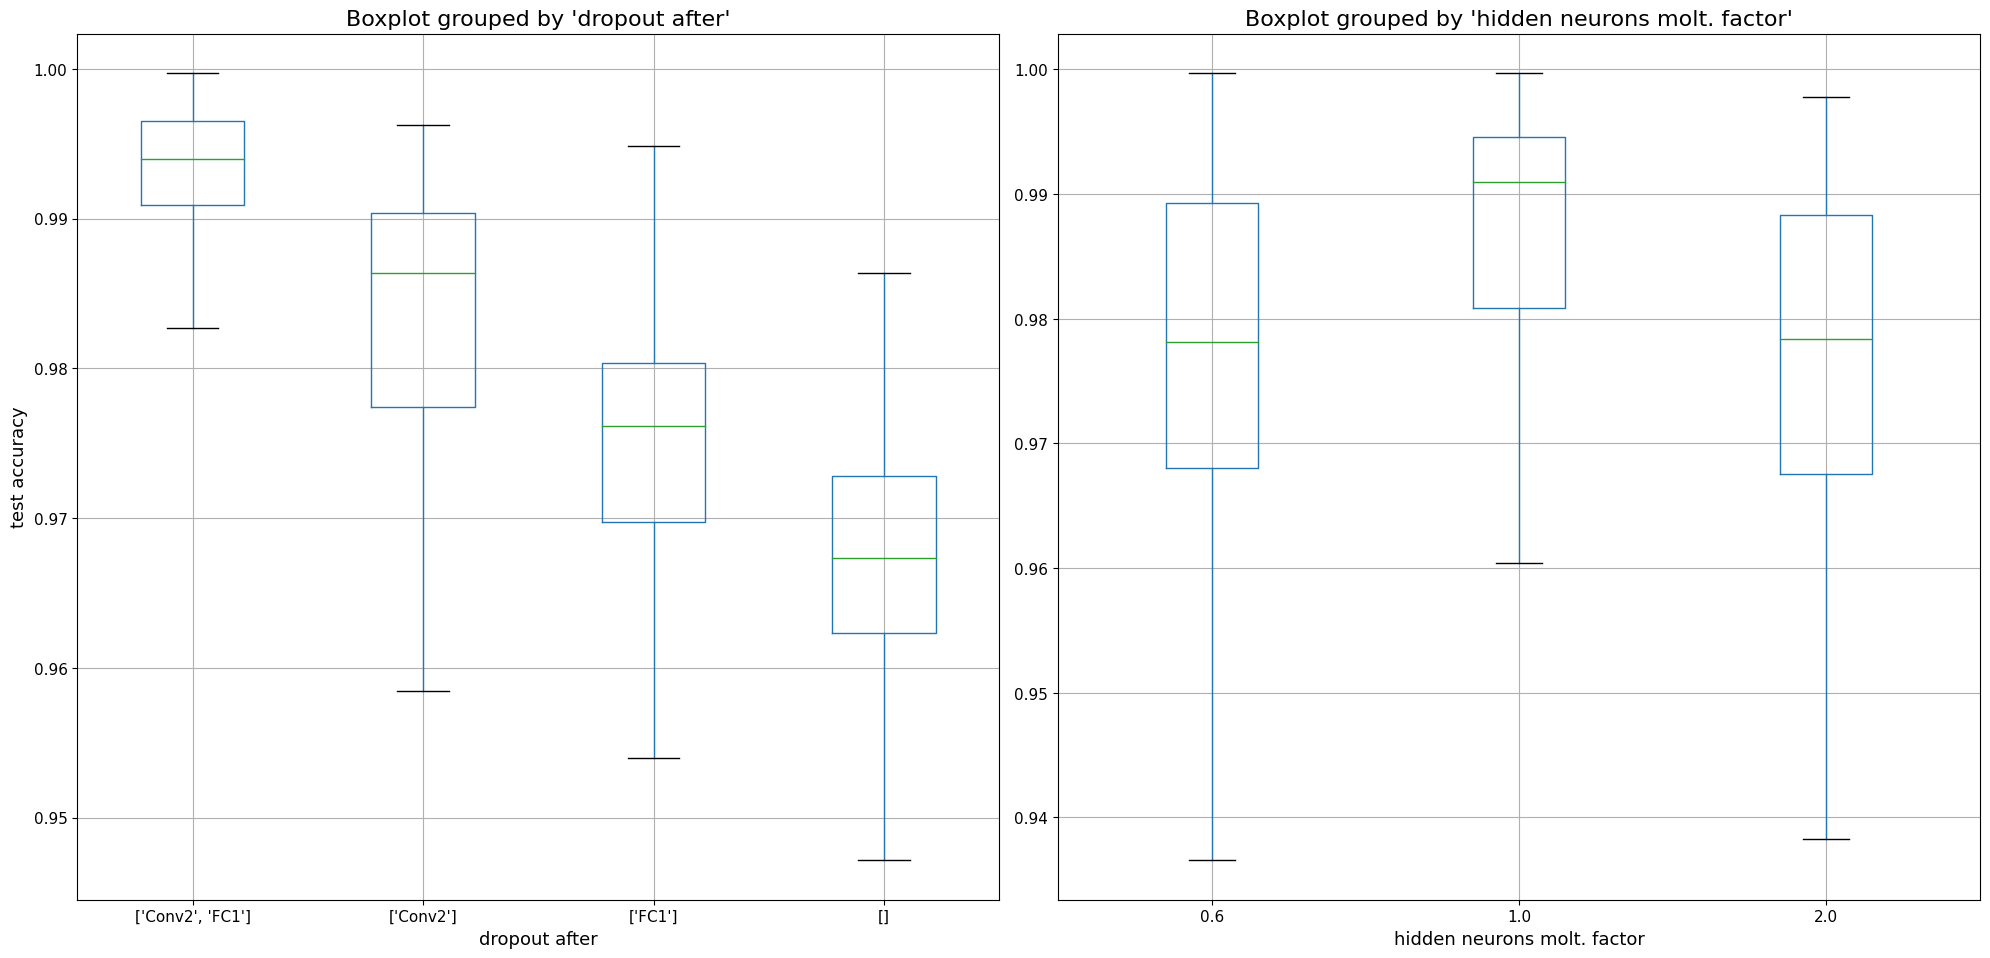

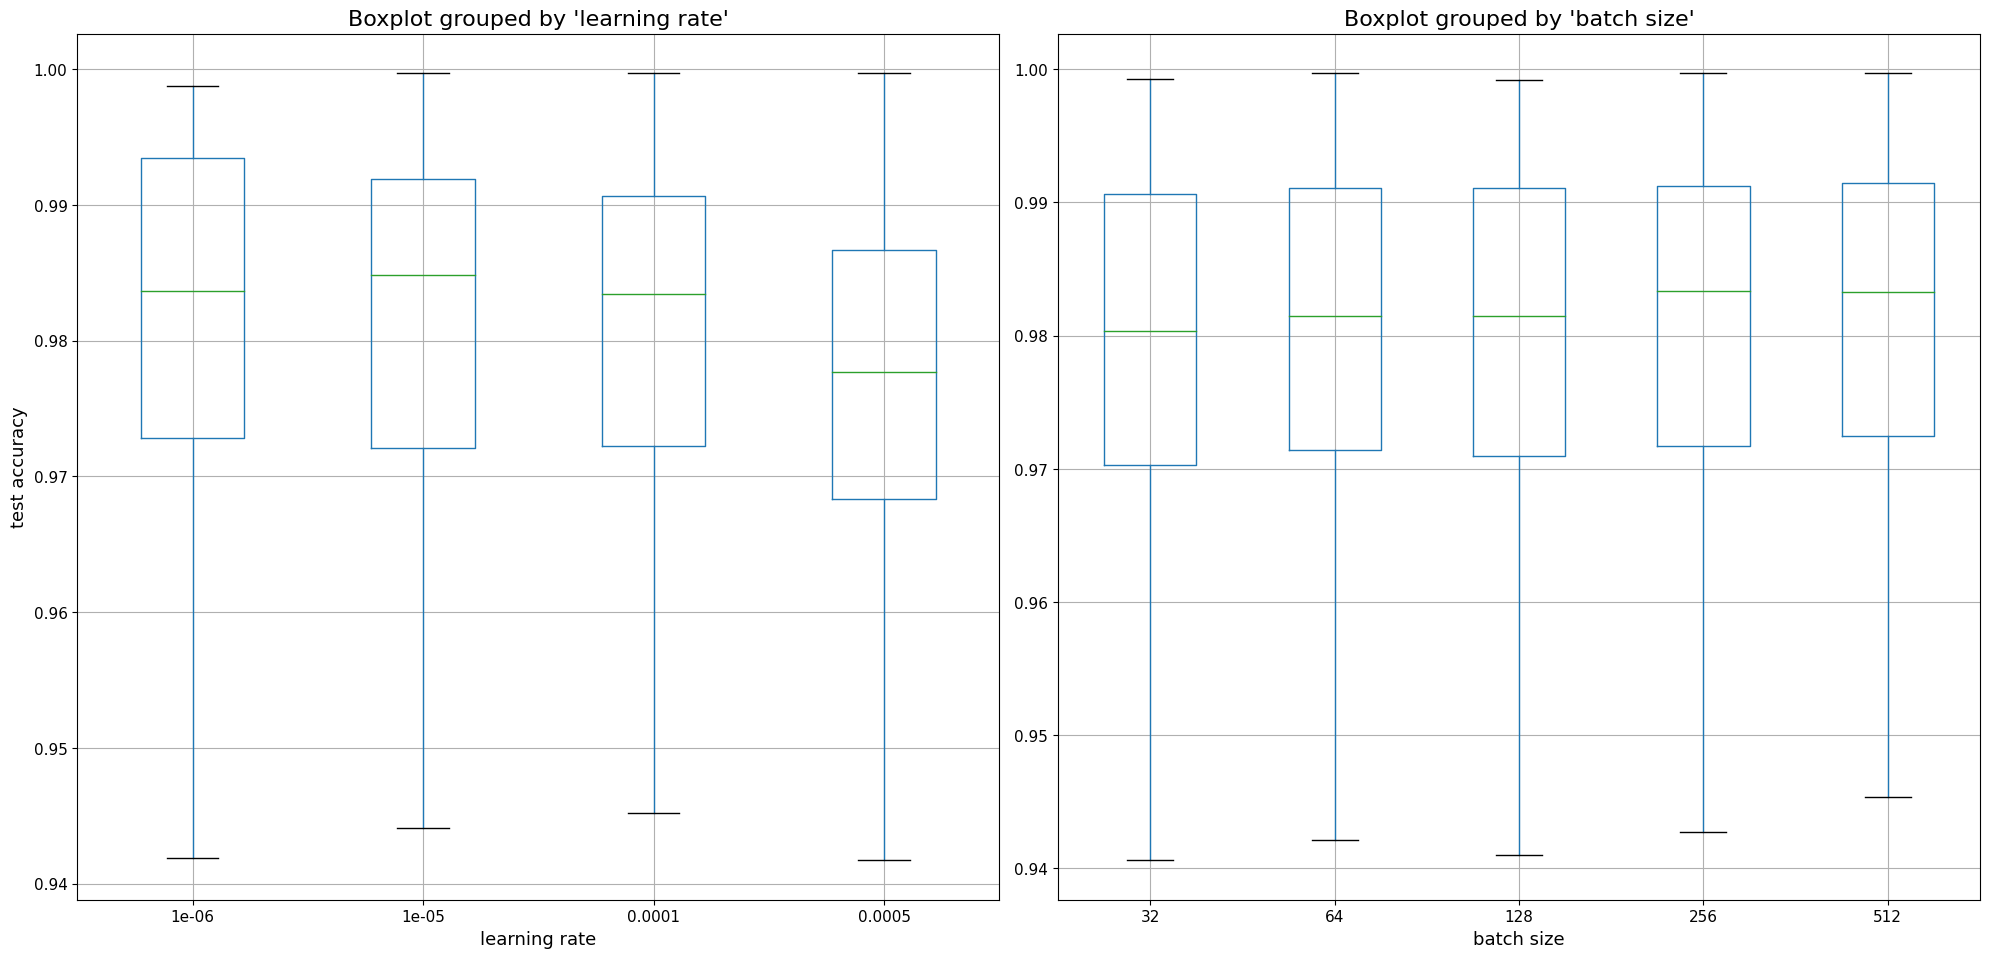

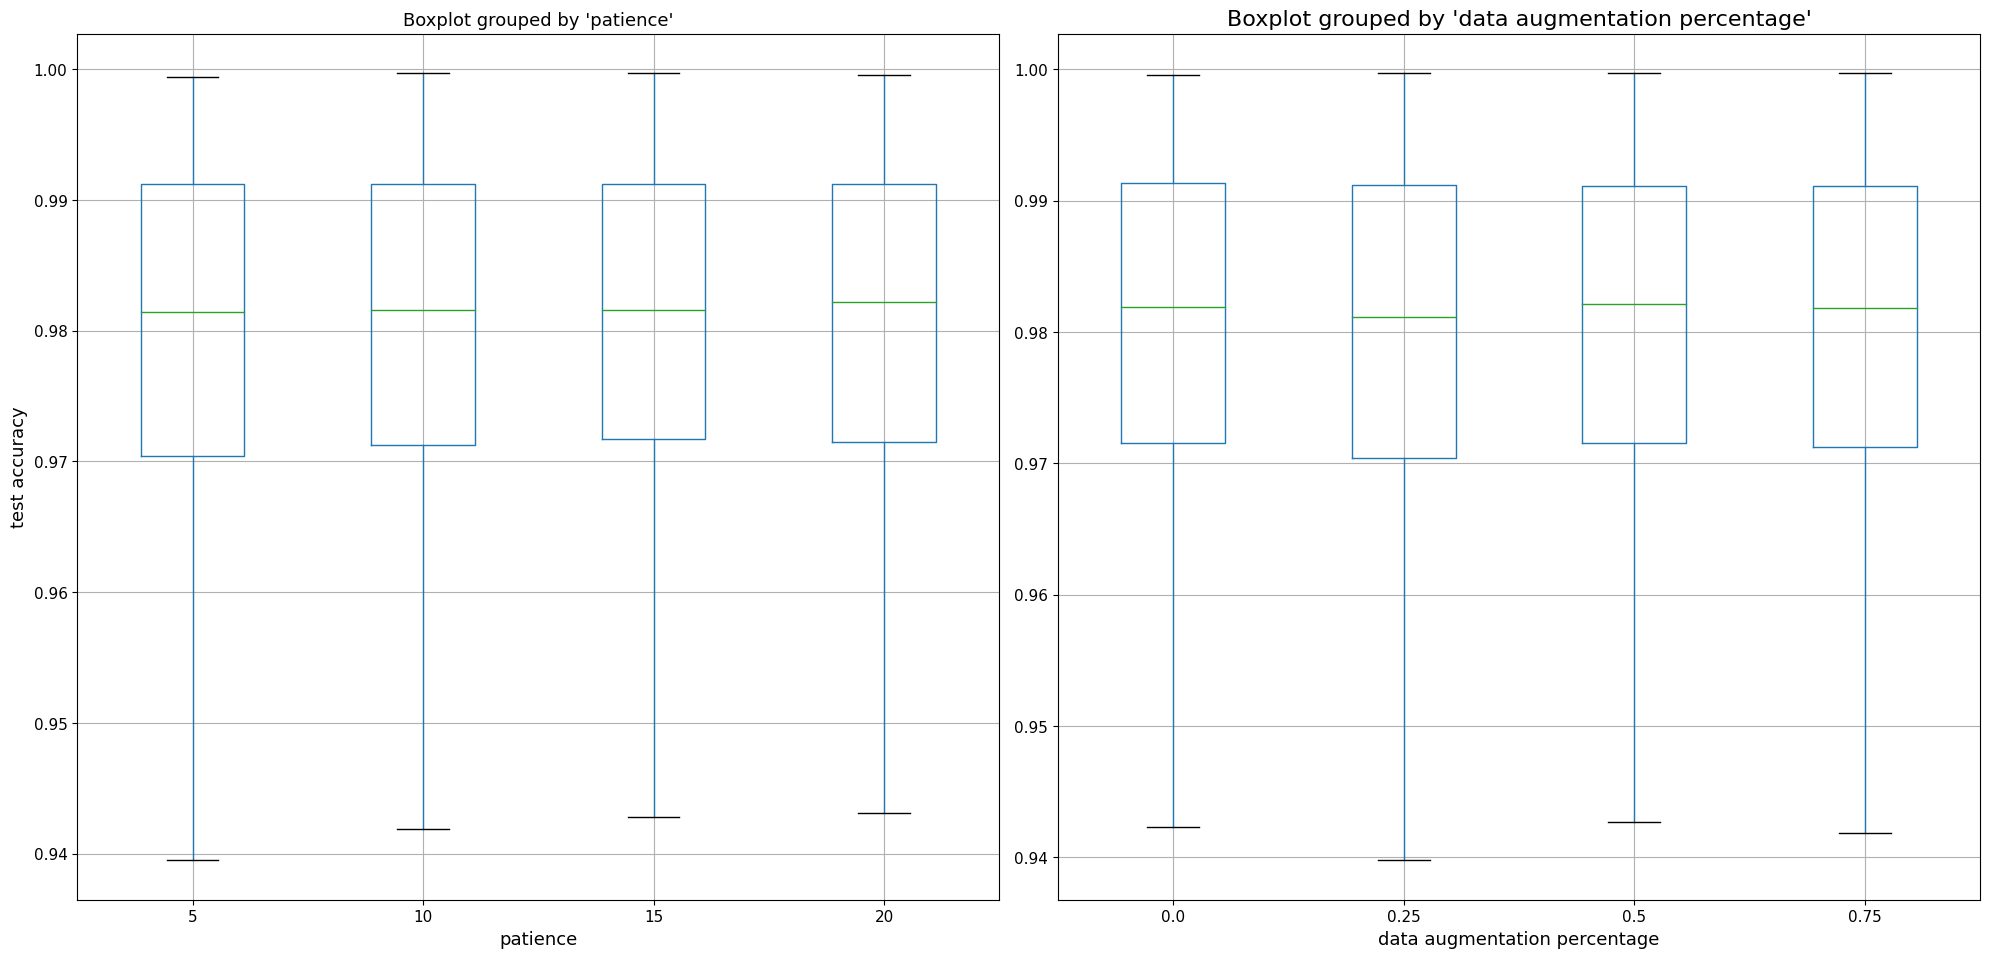

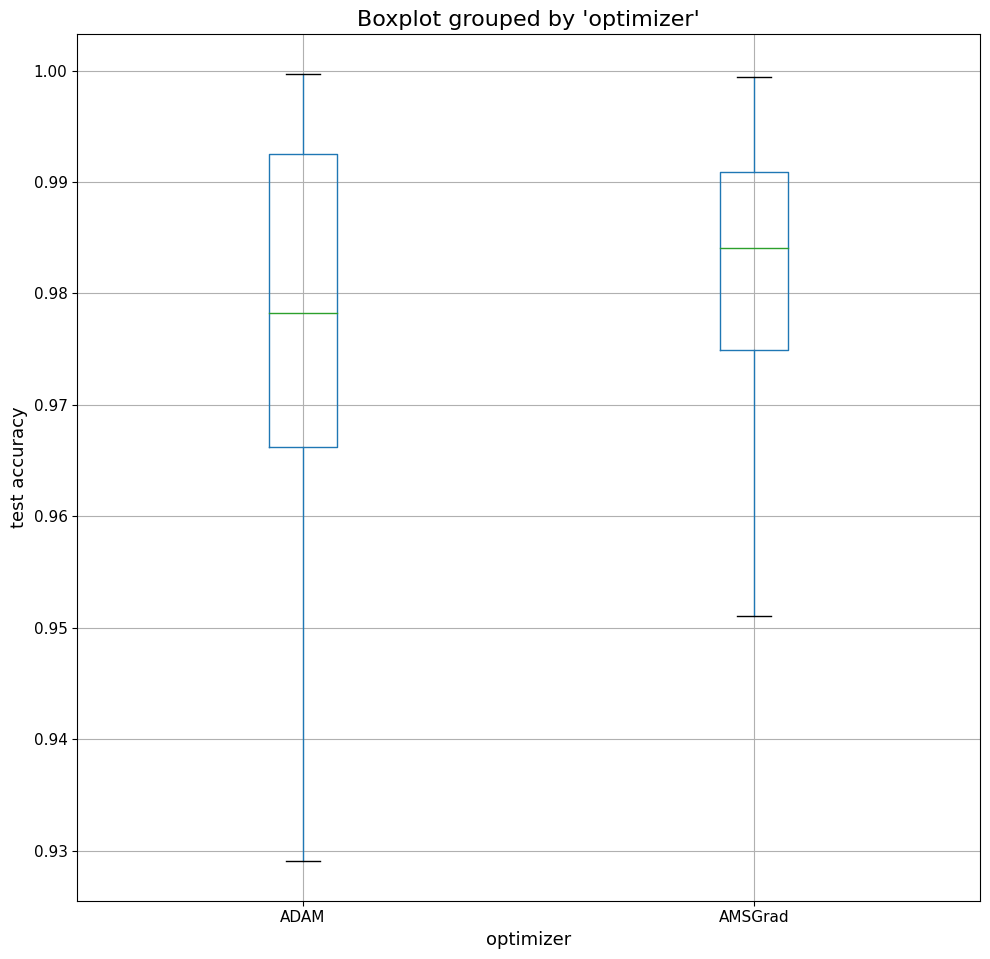

In [12]:
plot_hyper(all_results, remove_outliers=True)

# Best model

In [13]:
all_results.sort_values(by=['test_accuracies'], ascending=False).head(10)

,test_id,architecture_id,n_neurons_molt_factor,do_dropout,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
1098,458,1,0.6,"['Conv2', 'FC1']",ADAM,0.00010,256,15,0.50,0.999721,0.032457,5.644395
4951,471,8,1.0,"['Conv2', 'FC1']",ADAM,0.00010,512,10,0.75,0.999721,0.030653,4.233056
4982,502,8,1.0,"['Conv2', 'FC1']",ADAM,0.00001,64,10,0.50,0.999721,0.044892,5.750061
4869,389,8,1.0,"['Conv2', 'FC1']",ADAM,0.00050,512,10,0.25,0.999721,0.030639,9.751539
4959,479,8,1.0,"['Conv2', 'FC1']",ADAM,0.00010,512,20,0.75,0.999582,0.030628,8.013318
1096,456,1,0.6,"['Conv2', 'FC1']",ADAM,0.00010,256,15,0.00,0.999582,0.032469,11.022269
4623,143,8,1.0,"['Conv2', 'FC1']",AMSGrad,0.00010,256,20,0.75,0.999442,0.032897,42.324847
4955,475,8,1.0,"['Conv2', 'FC1']",ADAM,0.00010,512,15,0.75,0.999442,0.030631,6.125534
4627,147,8,1.0,"['Conv2', 'FC1']",AMSGrad,0.00010,512,5,0.75,0.999442,0.030602,2.640242
1093,453,1,0.6,"['Conv2', 'FC1']",ADAM,0.00010,256,10,0.25,0.999442,0.032424,3.304197


Loaded model: Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2', 'FC1'])_test_458


Architecture:
name: Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2', 'FC1'])
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 12, 12]          --
|    └─Conv2d: 2-1                       [-1, 16, 24, 24]          416
|    └─MaxPool2d: 2-2                    [-1, 16, 12, 12]          --
|    └─ReLU: 2-3                         [-1, 16, 12, 12]          --
├─Sequential: 1-2                        [-1, 32, 4, 4]            --
|    └─Conv2d: 2-4                       [-1, 32, 8, 8]            12,832
|    └─MaxPool2d: 2-5                    [-1, 32, 4, 4]            --
|    └─ReLU: 2-6                         [-1, 32, 4, 4]            --
|    └─Dropout: 2-7                      [-1, 32, 4, 4]            --
├─Sequential: 1-3                        [-1, 307]                 --
|    └─Linear: 2-8                 

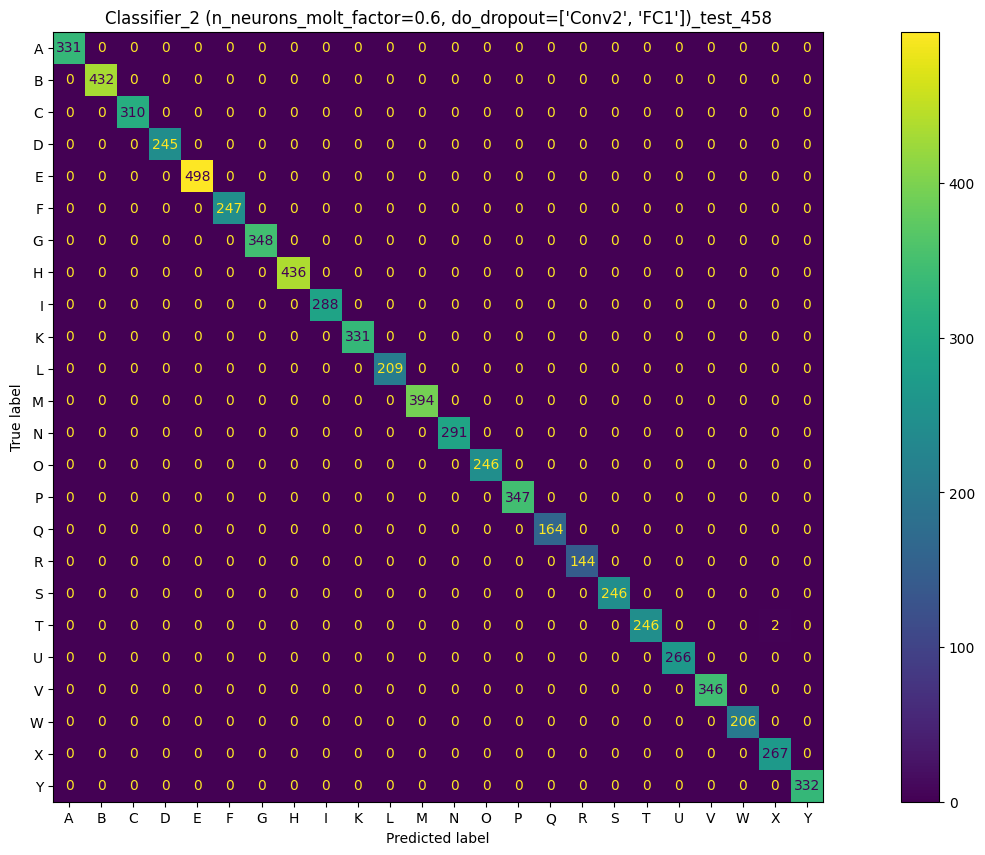

0.9997211377579476
WRONG PREDICTIONS:


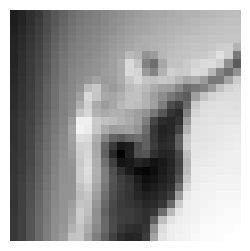

true response: T
predicted: X


{'A': 0.0,
 'B': 0.0,
 'C': 0.0005,
 'D': 1e-04,
 'E': 0.0,
 'F': 0.0,
 'G': 0.254,
 'H': 0.0227,
 'I': 0.0,
 'K': 0.0,
 'L': 1e-04,
 'M': 0.0,
 'N': 0.0,
 'O': 1e-04,
 'P': 0.0,
 'Q': 0.0,
 'R': 0.0,
 'S': 0.0,
 'T': 0.327,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 0.3956,
 'Y': 0.0}

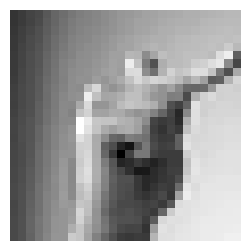

true response: T
predicted: X


{'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'E': 0.0,
 'F': 0.0,
 'G': 0.0095,
 'H': 0.0003,
 'I': 0.0,
 'K': 0.0,
 'L': 0.0,
 'M': 0.0,
 'N': 0.0,
 'O': 0.0,
 'P': 0.0,
 'Q': 0.0,
 'R': 0.0,
 'S': 0.0,
 'T': 0.3689,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 0.6212,
 'Y': 0.0}

In [14]:
best_model = NeuralNetwork.load_NN(all_results.iloc[1098], classifiers_dict, torch.device("cuda"), (28,28))
best_model.explore_wrong_predictions()

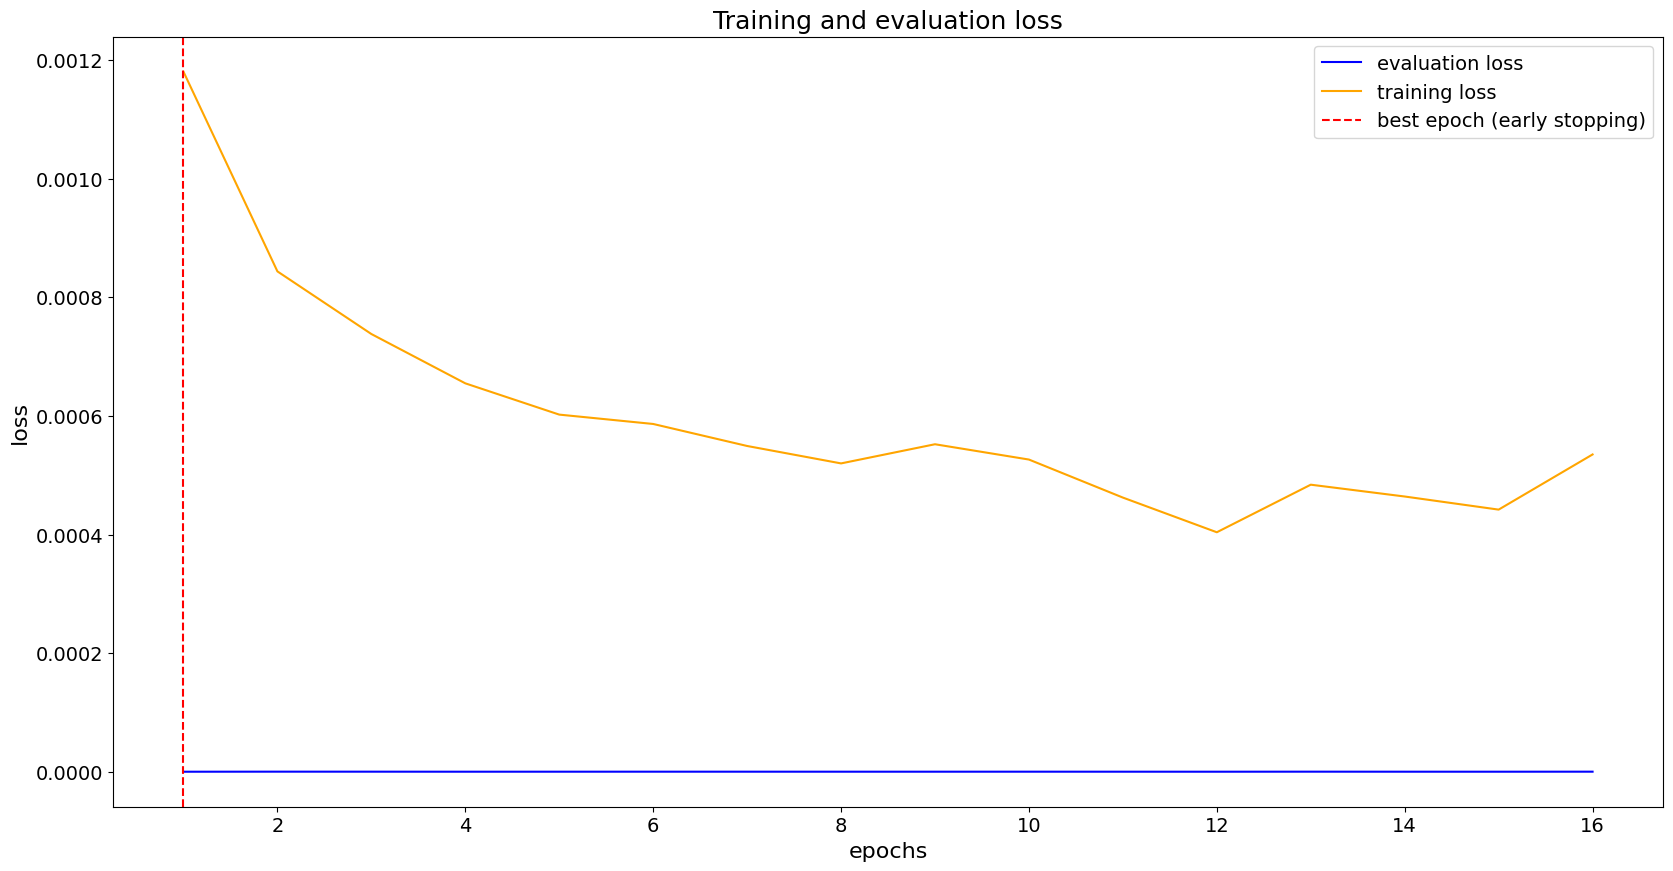

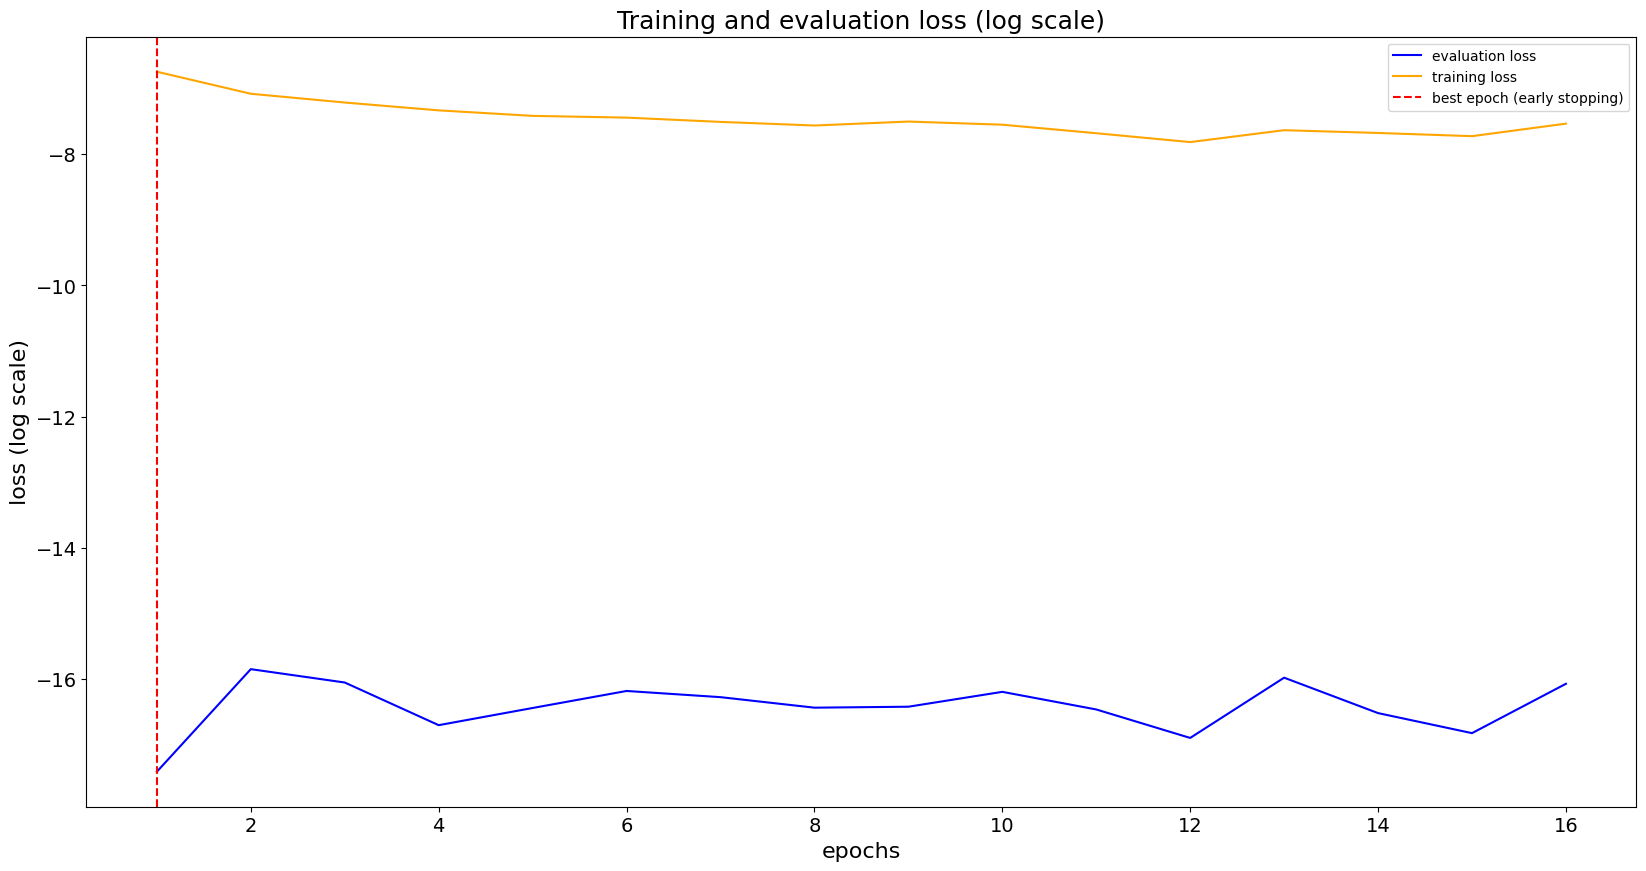

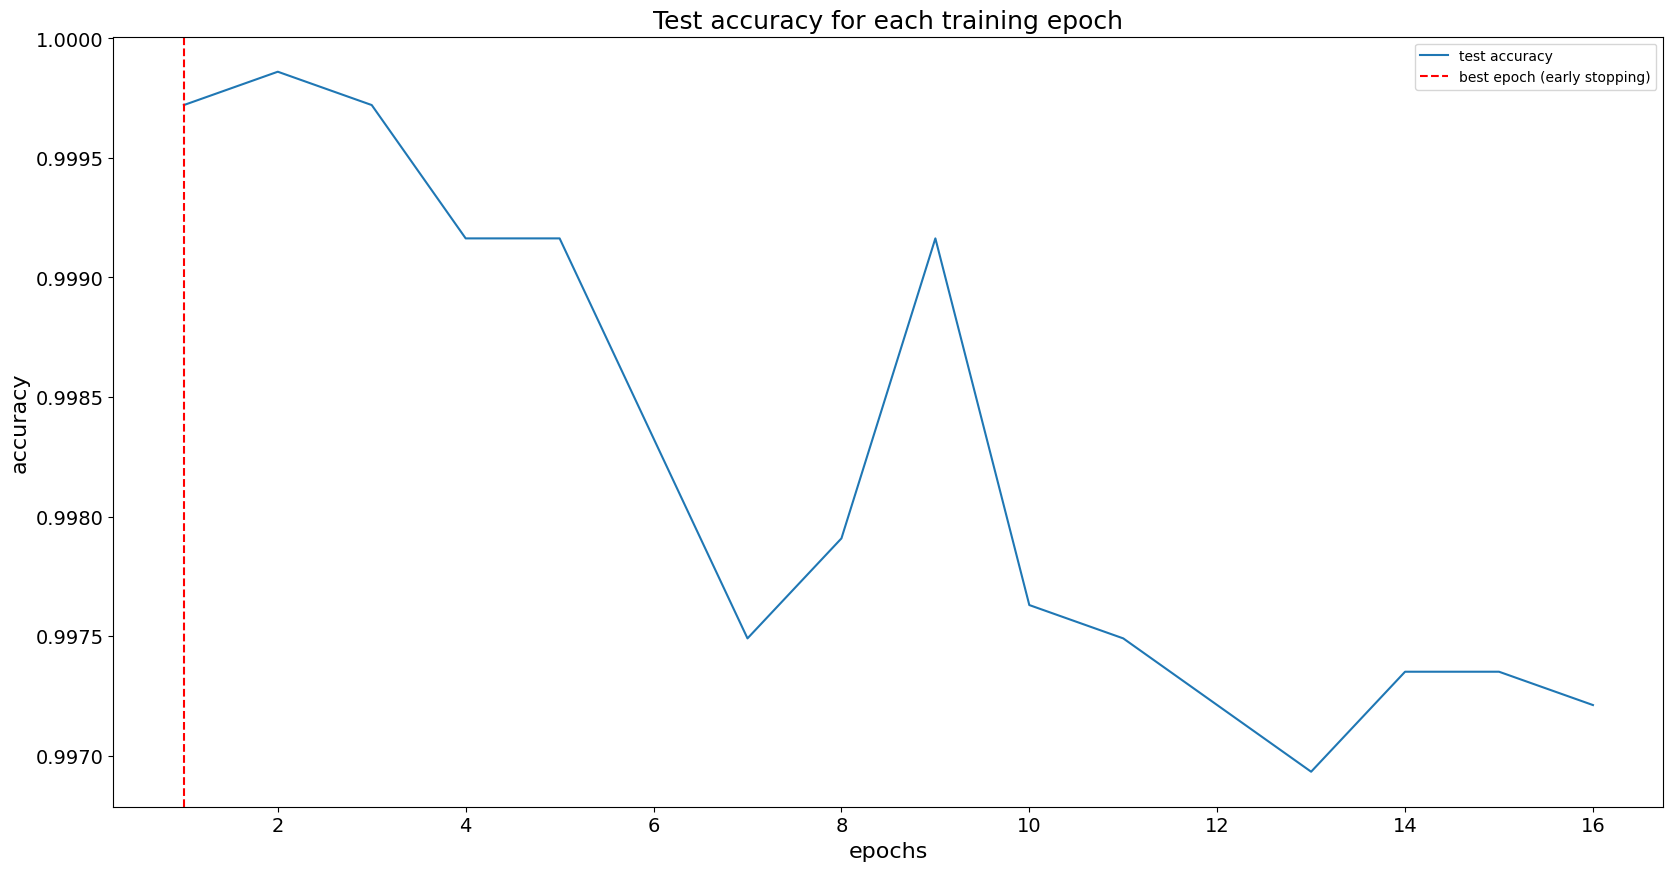

In [15]:
best_model.plot_metrics()

# Worst Model

In [16]:
all_results.sort_values(by=['test_accuracies'], ascending=True).head(10)

,test_id,architecture_id,n_neurons_molt_factor,do_dropout,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
2475,555,4,0.6,['Conv2'],ADAM,0.00001,512,15,0.75,0.745956,0.030077,6.005441
2447,527,4,0.6,['Conv2'],ADAM,0.00001,128,20,0.75,0.762967,0.034332,9.721078
2474,554,4,0.6,['Conv2'],ADAM,0.00001,512,15,0.50,0.763804,0.029922,5.066207
2459,539,4,0.6,['Conv2'],ADAM,0.00001,256,15,0.75,0.770218,0.032431,6.544358
2370,450,4,0.6,['Conv2'],ADAM,0.00010,256,5,0.50,0.777328,0.032407,2.041831
2471,551,4,0.6,['Conv2'],ADAM,0.00001,512,10,0.75,0.788901,0.030084,4.087269
2467,547,4,0.6,['Conv2'],ADAM,0.00001,512,5,0.75,0.789877,0.029913,2.239694
2463,543,4,0.6,['Conv2'],ADAM,0.00001,256,20,0.75,0.790714,0.032550,8.984673
2473,553,4,0.6,['Conv2'],ADAM,0.00001,512,15,0.25,0.791272,0.030044,4.339362
2466,546,4,0.6,['Conv2'],ADAM,0.00001,512,5,0.50,0.793642,0.030139,1.867398


Loaded model: Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2'])_test_555


Architecture:
name: Classifier_2 (n_neurons_molt_factor=0.6, do_dropout=['Conv2'])
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 12, 12]          --
|    └─Conv2d: 2-1                       [-1, 16, 24, 24]          416
|    └─MaxPool2d: 2-2                    [-1, 16, 12, 12]          --
|    └─ReLU: 2-3                         [-1, 16, 12, 12]          --
├─Sequential: 1-2                        [-1, 32, 4, 4]            --
|    └─Conv2d: 2-4                       [-1, 32, 8, 8]            12,832
|    └─MaxPool2d: 2-5                    [-1, 32, 4, 4]            --
|    └─ReLU: 2-6                         [-1, 32, 4, 4]            --
|    └─Dropout: 2-7                      [-1, 32, 4, 4]            --
├─Sequential: 1-3                        [-1, 307]                 --
|    └─Linear: 2-8                       [-1, 307

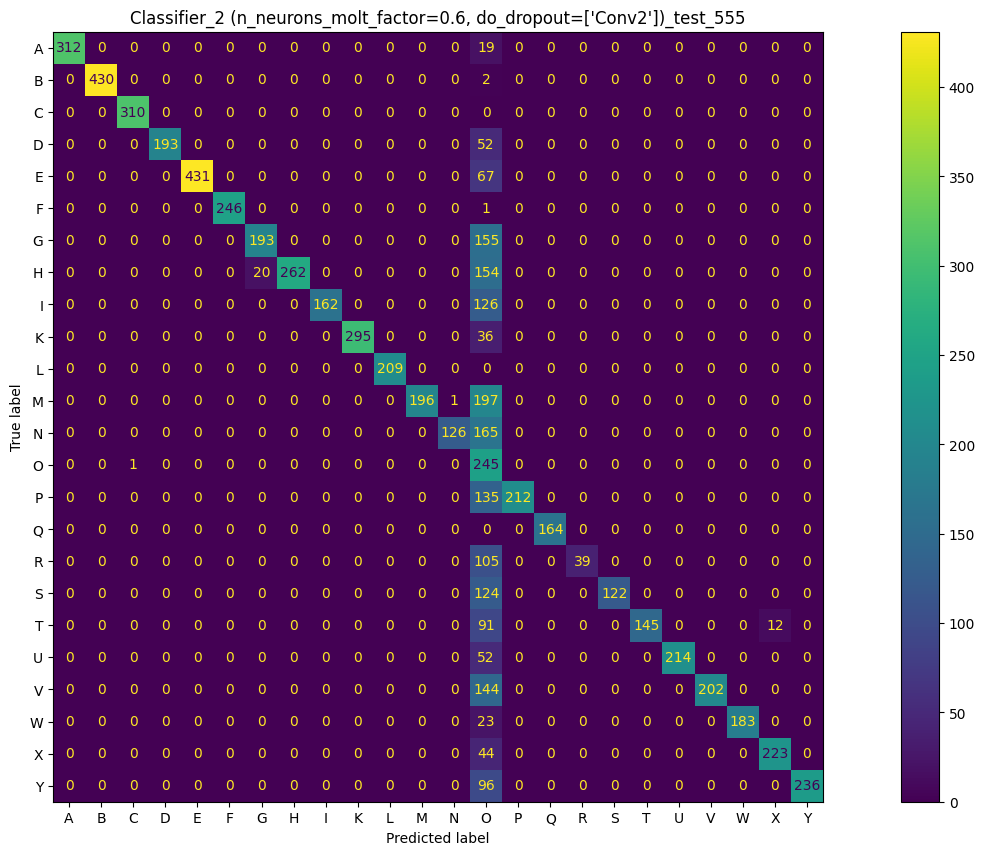

0.7459564974902398


In [17]:
worst_model = NeuralNetwork.load_NN(all_results.iloc[2475], classifiers_dict, torch.device("cuda"), (28,28))
worst_model.plot_confusion_matrix()

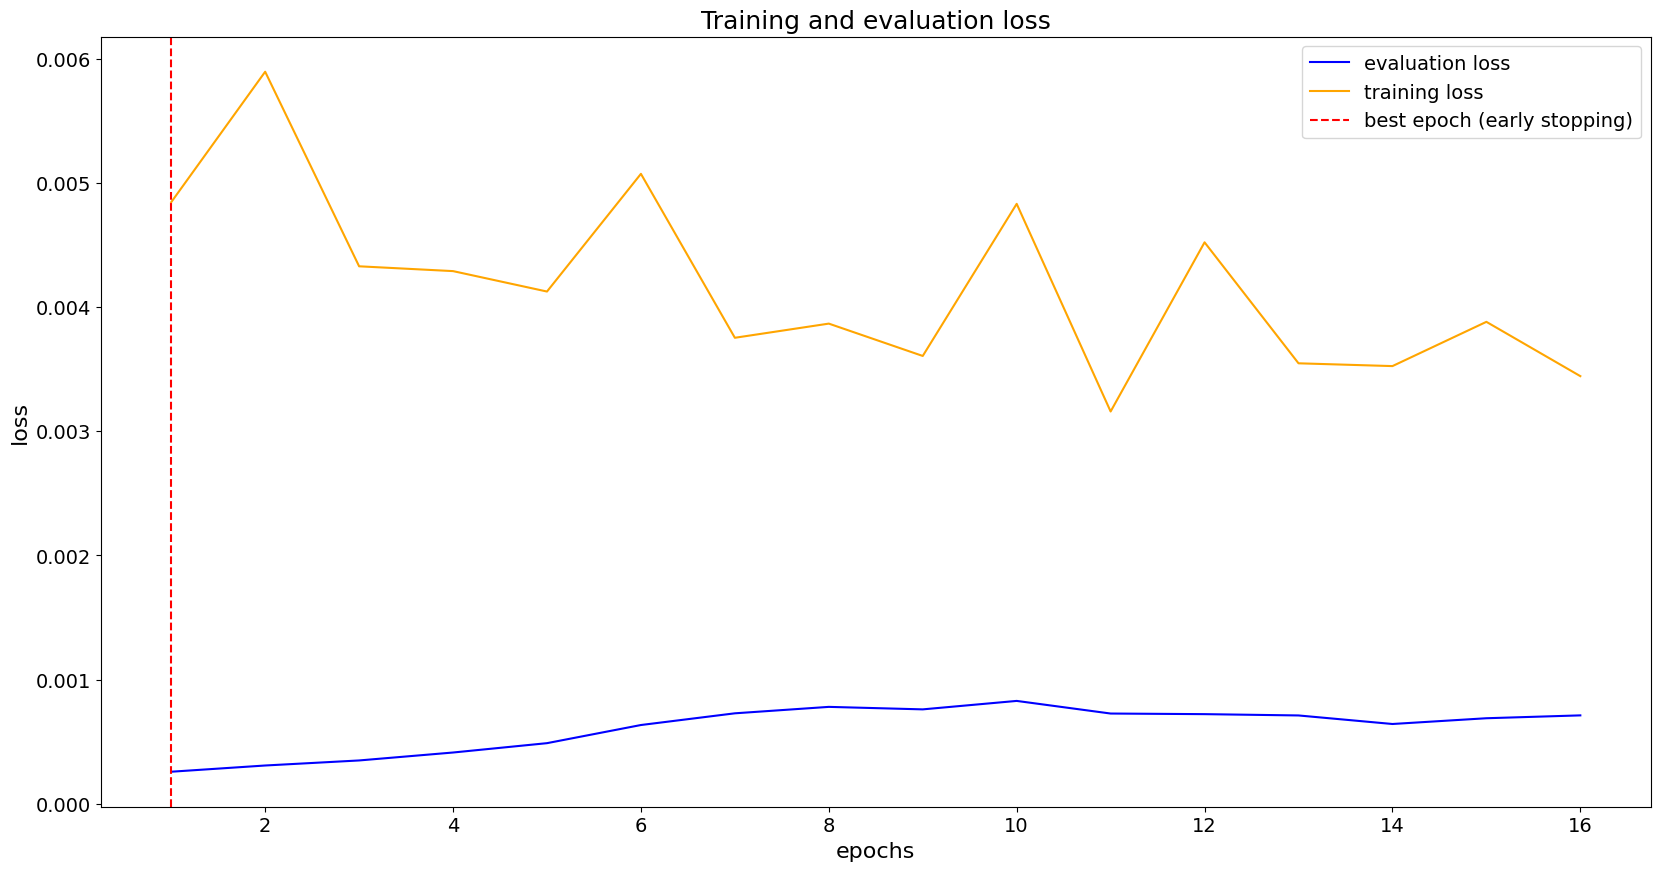

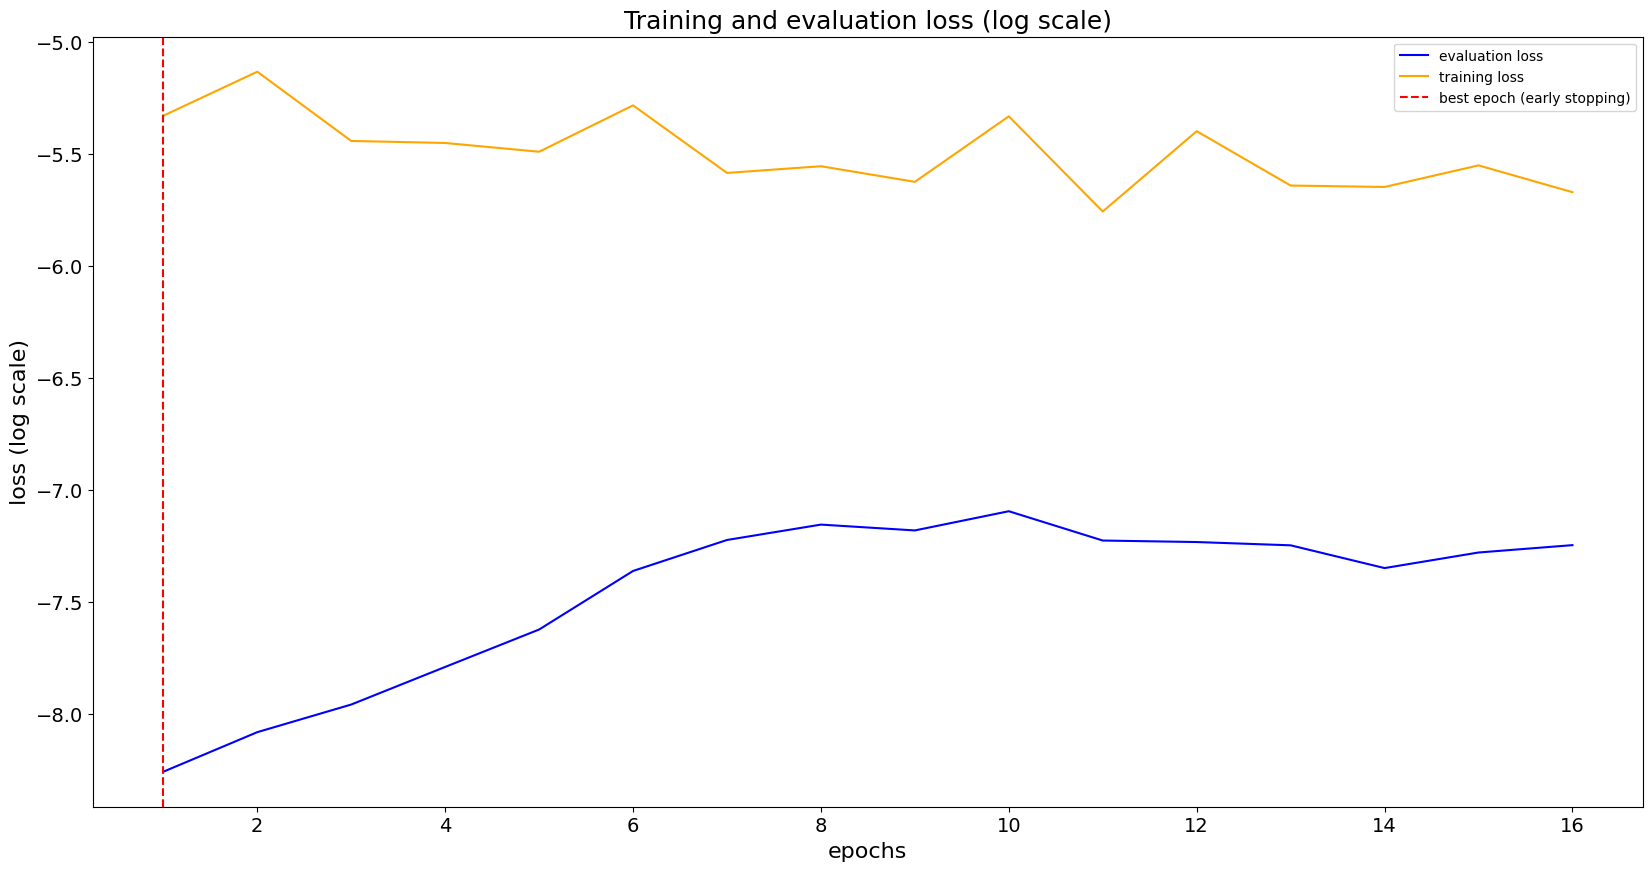

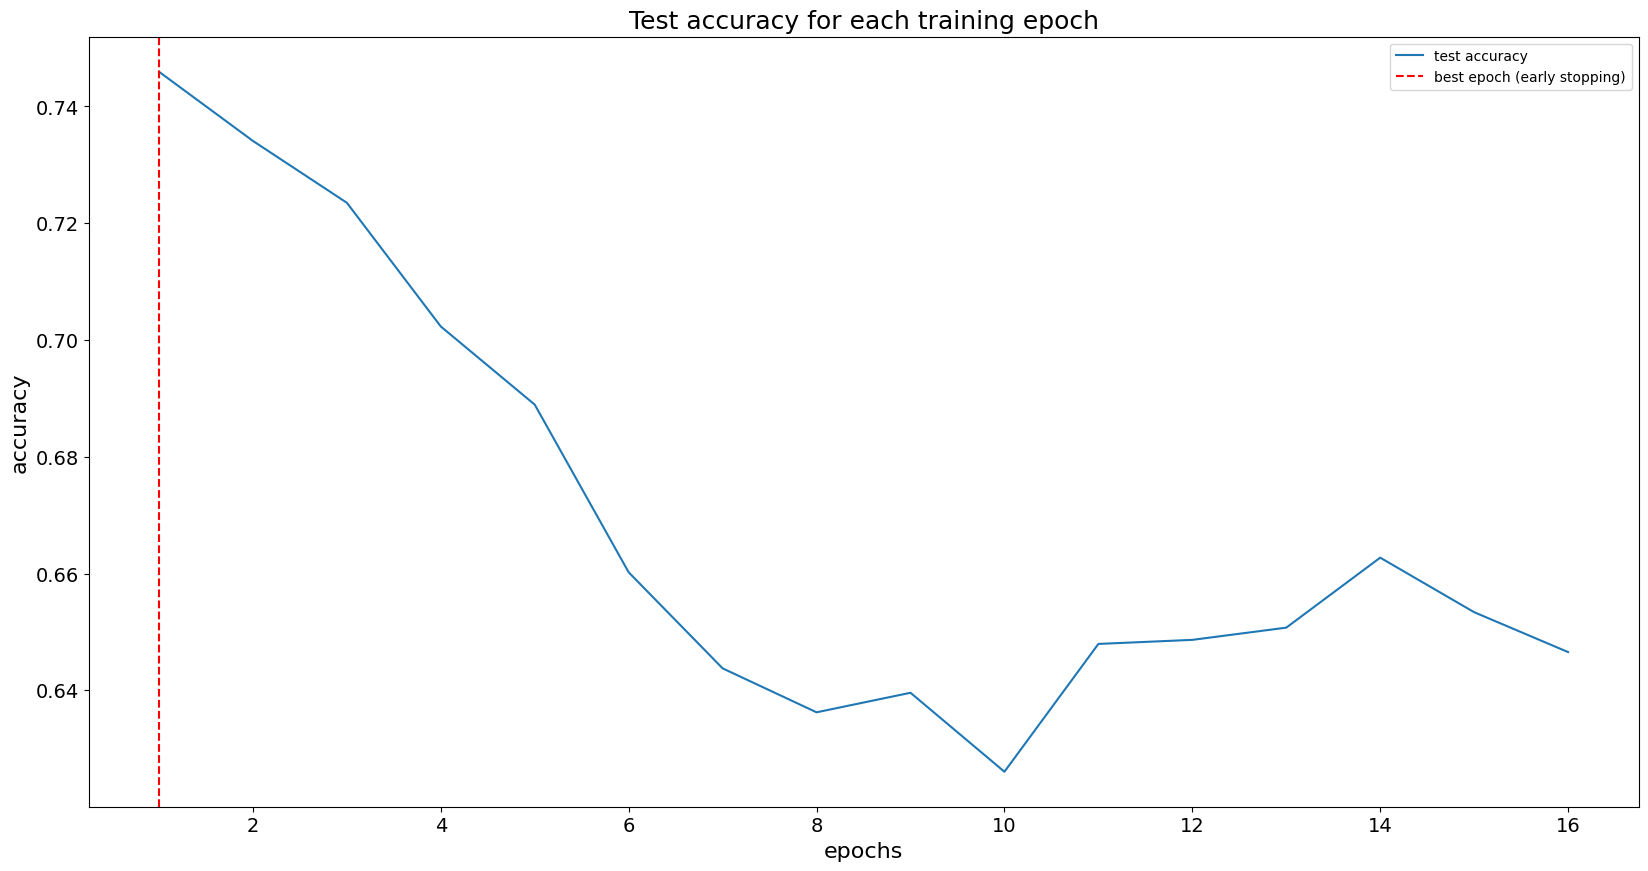

In [18]:
worst_model.plot_metrics()

# Use the model

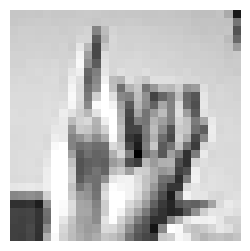

True label: I


{'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'E': 0.0,
 'F': 0.0,
 'G': 0.0,
 'H': 0.0,
 'I': 1.0,
 'K': 0.0,
 'L': 0.0,
 'M': 0.0,
 'N': 0.0,
 'O': 0.0,
 'P': 0.0,
 'Q': 0.0,
 'R': 0.0,
 'S': 0.0,
 'T': 0.0,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 0.0,
 'Y': 0.0}

In [19]:
image, response = sample_image(index = 10)
best_model.predict(image)